# **Toxicity Detection**

# Importing the Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


# Data Exploration and Preprocessing

In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/NaUKMA/ML/ToxicityDetection/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/NaUKMA/ML/ToxicityDetection/test.csv')

In [5]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df_test.head()

,Unnamed: 0,id,comment_text
0,5,0001ea8717f6de06,Thank you for understanding. I think very high...
1,7,000247e83dcc1211,:Dear god this site is horrible.
2,11,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig..."
3,13,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ..."
4,14,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l..."


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


Here we see that train dataset contains **159571** samples.

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63978 entries, 0 to 63977
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    63978 non-null  int64 
 1   id            63978 non-null  object
 2   comment_text  63978 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


The test dataset contains **63978** samples.

Next we define some utility functions for viewing the dataset statistics.

In [9]:
def show_percentiles(df, col, name):
  # Calculating the counts that cover 100%, 90%, 80%, ..., 10% of the rows
  percentiles = list(range(100, 0, -10))
  counts_percentiles = np.percentile(df[col], percentiles)

  # Displaying the counts at each percentile
  for percentile, count in zip(percentiles, counts_percentiles):
      print(f"{percentile}% of the rows have at most {int(count)} {name}s.")

In [10]:
def plot_hist(col, name, range=100):
  # Creating a histogram of counts for df_train
  plt.hist(df_train[col], bins=50, range=(0, range), alpha=0.5, label='Train Data')
  # Creating a histogram of counts for df_test
  plt.hist(df_test[col], bins=50, range=(0, range), alpha=0.5, label='Test Data')

  plt.xlabel(f'Number of {name}s')
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {name} Counts')
  plt.legend()  # Adding a legend to distinguish between train and test data
  plt.show()

The first statistic that interests us is the number of words in every sample.

In [11]:
df_train['word_count'] = df_train['comment_text'].apply(lambda x: len(x.split()))
df_test['word_count'] = df_test['comment_text'].apply(lambda x: len(x.split()))

In [12]:
print("In df_train:")
show_percentiles(df_train, 'word_count', 'word')

In df_train:
100% of the rows have at most 1411 words.
90% of the rows have at most 152 words.
80% of the rows have at most 91 words.
70% of the rows have at most 63 words.
60% of the rows have at most 47 words.
50% of the rows have at most 36 words.
40% of the rows have at most 27 words.
30% of the rows have at most 20 words.
20% of the rows have at most 14 words.
10% of the rows have at most 8 words.


In [13]:
print("In df_test:")
show_percentiles(df_test, 'word_count', 'word')

In df_test:
100% of the rows have at most 2321 words.
90% of the rows have at most 143 words.
80% of the rows have at most 86 words.
70% of the rows have at most 60 words.
60% of the rows have at most 45 words.
50% of the rows have at most 34 words.
40% of the rows have at most 25 words.
30% of the rows have at most 18 words.
20% of the rows have at most 12 words.
10% of the rows have at most 7 words.


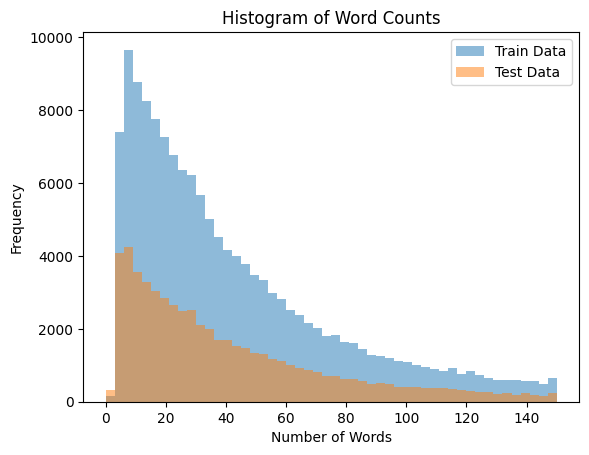

In [ ]:
plot_hist('word_count', 'Word', range=150)

Next we display the distribution of character counts in different samples.

In [ ]:
# Calculate text lengths and create a new column
df_train['char_count'] = df_train['comment_text'].apply(len)
df_test['char_count'] = df_test['comment_text'].apply(len)

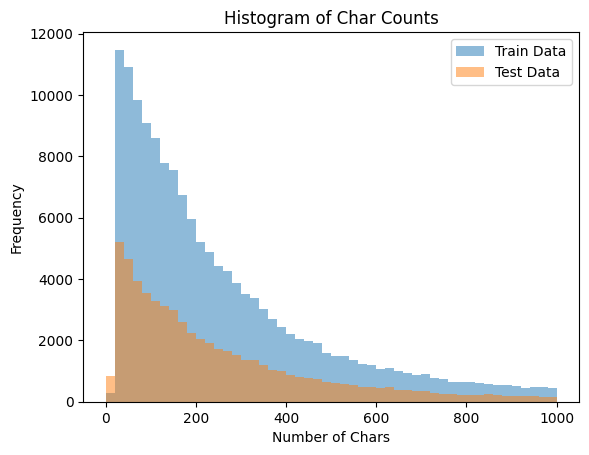

In [ ]:
plot_hist('char_count', 'Char', range=1000)

Finally, we display the distribution of capital letter counts in different samples.

In [ ]:
df_train['capital_letter_count'] = df_train['comment_text'].apply(lambda x: sum(1 for c in x if c.isupper()))
df_test['capital_letter_count'] = df_test['comment_text'].apply(lambda x: sum(1 for c in x if c.isupper()))

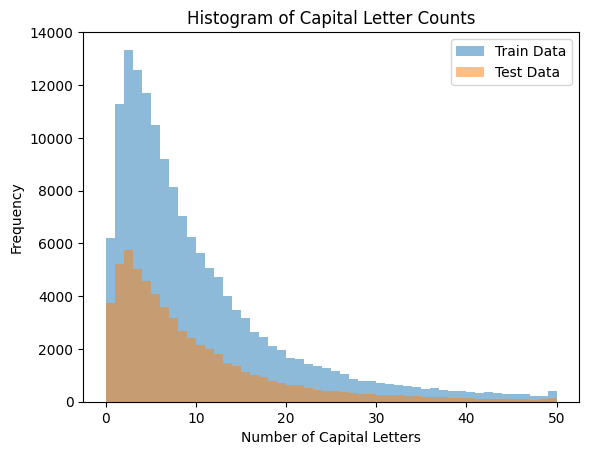

In [ ]:
plot_hist('capital_letter_count', 'Capital Letter', range=50)

In [ ]:
train_texts = [text for text in df_train['comment_text']]
test_texts = [text for text in df_test['comment_text']]

In [ ]:
def remove_special_symbols(texts):
    # Define a regular expression pattern to match special symbols
    special_symbol_pattern = r'[^A-Za-z\s]'  # This pattern matches anything that is not a letter, digit, or whitespace

    # Create a list to store the filtered texts
    filtered_texts = []

    # Iterate through each text and remove special symbols
    for text in texts:
        filtered_text = re.sub(special_symbol_pattern, '', text)
        filtered_texts.append(filtered_text)

    return filtered_texts

In [ ]:
filtered_train_texts = remove_special_symbols(train_texts)
filtered_test_texts = remove_special_symbols(test_texts)

In [ ]:
test_texts[0], filtered_test_texts[0]

('Thank you for understanding. I think very highly of you and would not revert without discussion.',
 'Thank you for understanding I think very highly of you and would not revert without discussion')